In [3]:
import pandas as pd
from matplotlib  import pyplot as pt

In [4]:
df=pd.read_csv("./income.csv")

In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

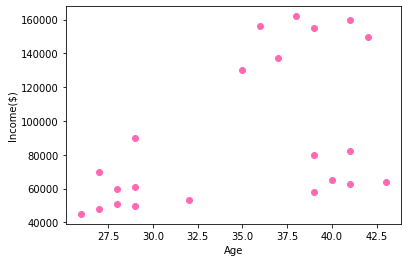

In [6]:
pt.scatter(df['Age'],df['Income($)'],color = 'hotpink')
pt.xlabel("Age")
pt.ylabel("Income($)")

In [7]:
from sklearn.cluster import KMeans


In [8]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
df['clusters']=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [10]:
km.cluster_centers_


array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

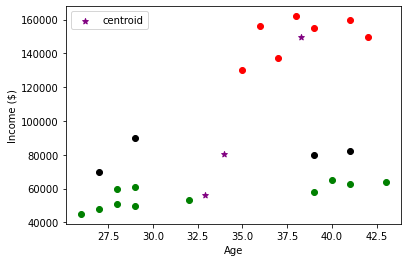

In [11]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
pt.scatter(df1.Age,df1['Income($)'],color='green')
pt.scatter(df2.Age,df2['Income($)'],color='red')
pt.scatter(df3.Age,df3['Income($)'],color='black')
pt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
pt.xlabel('Age')
pt.ylabel('Income ($)')
pt.legend()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Income($)']]

,Income($)
0,70000
1,90000
2,61000
3,60000
4,150000
5,155000
6,160000
7,162000
8,156000
9,130000


In [13]:


scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()


,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


No handles with labels found to put in legend.


Text(0, 0.5, 'Income')

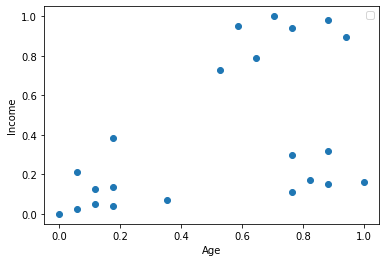

In [14]:
pt.scatter(df.Age,df['Income($)'])
pt.legend()
pt.xlabel("Age")
pt.ylabel("Income")


In [15]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df.head()
km.cluster_centers_



array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

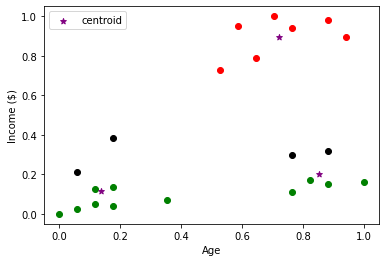

In [16]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
pt.scatter(df1.Age,df1['Income($)'],color='green')
pt.scatter(df2.Age,df2['Income($)'],color='red')
pt.scatter(df3.Age,df3['Income($)'],color='black')
pt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
pt.xlabel('Age')
pt.ylabel('Income ($)')
pt.legend()

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

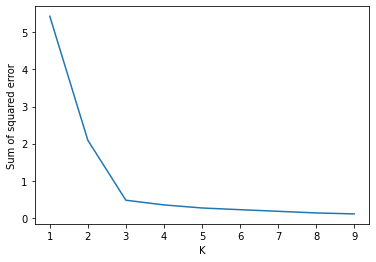

In [20]:
pt.xlabel('K')
pt.ylabel('Sum of squared error')
pt.plot(k_rng,sse)